## Cadenas de Markov absorventes

Un estado $i$ de una cadena de Markov se dice absorbente si es imposible abandonarlo (e.d. pii = 1).

Una cadena de Markov se dice absorbente si posee al menos un estado absorbente y desde cada estado es posible llegar al estado absorbente (no necesariamente en un paso), el resto de los estados se denominan transitorios.

Si reordenamos los estados la matriz de transición, la podemos escribir de la siguiente forma:

$$ P= \begin{pmatrix}
I & 0\\
R & Q
\end{pmatrix}$$

donde:

- $I$: matriz identidad correspondiente a los estados absorbentes
- $Q$: matriz de transición entre estados transitorios
- $R$: matriz de transición de estados transitorios a absorbentes

Se define como:

$$ N= (I−Q)^{−1}$$

$N_{ij}$: representa el número esperado de pasos en que la cadena llegue al estado j empezando desde el estado i, antes de ser absorbida.

Se define como:

$$B=NR$$

$B_{ij}$: indica la probabilidad de ser absorbido en el estado absorbente j si se empieza en el estado transitorio i.

Tiempo esperado hasta la absorción:

$$t_i=\sum_j N_{ij}$$

En forma vectorial: $t=N1$

Entonces, una vez que la cadena entra en un estado absorbente, se queda allí para siempre.

Los estados no absorbentes son transitorios: eventualmente desaparecerán del sistema.

La estructura de $Q$ y $R$ te permite calcular cuánto tarda en absorberse la cadena y en qué estado termina.

Ejemplo 1: Supongamos que tenemos una cadena con 4 estados.

- Estados 1 y 4 son absorbentes.
- Estados 2 y 3 son transitorios.

La matriz de transición $P$ es:

$$P= \begin{pmatrix}
1 & 0 & 0 & 0 \\
0.3 & 0.4 & 0.3 & 0 \\
0 & 0.2 & 0.5 & 0.3 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}$$

Identificamos las submatrices, reordenamos los estados (absorbentes primero), recordar que queremos la forma:

$$ P= \begin{pmatrix}
I & 0\\
R & Q
\end{pmatrix}$$

$$ I= \begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}$$

$$ R= \begin{pmatrix}
0.3 & 0 \\
0 & 0.3 \\
\end{pmatrix}$$

$$ Q= \begin{pmatrix}
0.4 & 0.3 \\
0.2 & 0.5 \\
\end{pmatrix}$$

Los estados transitorios son 2 y 3.

In [30]:
# calculo de las matrices

import numpy as np

I = np.eye(2)
Q = np.array([[0.4, 0.3], [0.2, 0.5]])
R = np.array([[0.3, 0], [0, 0.3]])

N = np.linalg.inv((I-Q))
print("La matriz de N (fundamental):")
print(N)

print("--------------")
#B = np.dot(N, R)
#B = np.matmul(N, R)
B = N @ R
print("La matriz de B (probabilidad de absorción):")
print(B)

print("--------------")
# tiempo esperado de absorcion
t = N @ np.ones((2,1))
print("Tiempo esperado de absorción:")
print(t)

La matriz de N (fundamental):
[[2.08333333 1.25      ]
 [0.83333333 2.5       ]]
--------------
La matriz de B (probabilidad de absorción):
[[0.625 0.375]
 [0.25  0.75 ]]
--------------
Tiempo esperado de absorción:
[[3.33333333]
 [3.33333333]]


In [38]:
# Se deberia graficar, investigue como se dibuja un grafo
import networkx as nx

#G = nx.DiGraph()
#G.add_edge(i, j, weight=prob)
#plt.figure(figsize=(w, h))
#nx.draw_networkx_nodes(...)
#nx.draw_networkx_labels(...)
#nx.draw_networkx_edges(...)
#nx.draw_networkx_edge_labels(...)
#plt.title(...)
#plt.axis("off")
#plt.tight_layout()
#plt.show()

Ejemplo 2: Un jugador juega una repetidas veces a distintos
juegos en los que gana un dólar con probabilidad p o pierde un dólar con probabilidad 1 − p. Para de jugar cuando pierde todo su dinero o bien gana un total de N dólares.
Supongamos que juega a un juego que tiene probabilidad 1/2 de ganar un dólar y probabilidad 1/2 de perderlo. Parará cuando se quede sin dinero o cuando alcance 4 dólares.

![Estados](estados.png)



In [10]:
import numpy as np
mt=np.array([[1, 0, 0, 0, 0],
             [1/2, 0, 1/2, 0, 0],
             [0, 1/2, 0, 1/2,0],
             [0, 0, 1/2, 0, 1/2],
             [0, 0, 0, 0,1]])

La pregunta más obvia que se puede hacer en este tipo de cadenas es: ¿**cuál es
la probabilidad de que el proceso alcance alguna vez un estado absorbente**? Otras preguntas interesantes son:

a) Dado un estado absorbente, ¿cuál es la probabilidad de que el proceso finalice precisamente en dicho estado?

b) ¿En promedio, cuánto le costará al proceso ser absorbido?

c) En promedio, ¿cuántas veces pasará el proceso por cada estado transitorio?

Las respuestas a estas preguntas dependerán en general  **no sólo de las probabilidades
de transición, sino también del estado en el que se encuentre el proceso al empezar**.

En una cadena de Markov absorbente, **la probabilidad de estar en un
estado transitorio después de n pasos tiende a cero cuando $n → ∞$**. De aquí se sigue que
en una cadena de Markov absorbente con un número finito de estados, la probabilidad
de que el proceso sea absorbido es 1.

Las preguntas planteadas pueden resolverse análiticamente mediante Sistema de Ecuaciones. En nuestro caso se empleara la **Simulación de Montecarlo**.

Si el estado inicial es 2. Las respuestas son:

a) p(0)=0.5; p(4)=0.5

b) t=4

c) 1: 1; 2:2, 3:1

Si el estado inicial es 3.

a) p(0)=1/4; p(4)=3/4

Obtener las respuestas mediante la simulación de Montecarlo


In [11]:
# termina si el estado es 0 o 4
def juego(mt, current_state=np.array([0, 0,1,0,0]), max_juegos=1000):
    estados = [current_state]
    money=[current_state.argmax()]
    for k in range(max_juegos):
        current_state = np.dot(current_state, mt)
        estados.append(current_state)
        money.append(current_state.argmax())
    return estados, money

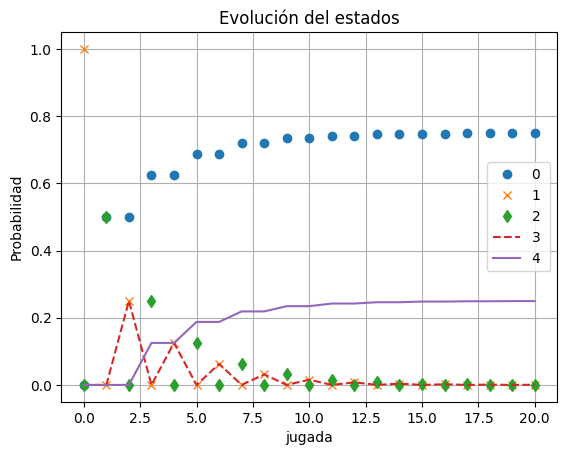

In [12]:
# asumiendo que inicialmente tengo 2 dólares.
current_state=np.array([0, 1,0,0,0])
estados, money=juego(mt, current_state, max_juegos=20)
estados = np.array(estados)

# Graficamos
plt.plot(estados[:, 0],"o", label='0 ')
plt.plot(estados[:, 1],"x", label='1 ')
plt.plot(estados[:, 2],"d", label='2 ')
plt.plot(estados[:, 3],"--", label='3 ')
plt.plot(estados[:, 4], label='4 ')
plt.xlabel('jugada')
plt.ylabel('Probabilidad')
plt.title('Evolución del estados')
plt.legend()
plt.grid(True)
plt.show()

## Empleando la Simulación de Montecarlo

In [25]:
import random
def juego(money):
    balance=[money]
    while(money!=0 and money !=4):
        if random.random()<1/2:
            money+=1 #gano
        else:
            money-=1 # pierdo
        balance.append(money)
    return balance

In [26]:
juego(2)


[2, 1, 2, 1, 2, 1, 2, 3, 4]

In [27]:
def Montecarlo(estado0, runs):
    balances=[]

    for k in range(runs):
        balance=juego(estado0)
        balances.append(balance)

    return balances

In [28]:
runs=1000
balances=Montecarlo(2,runs)

(array([523.,   0.,   0.,   0., 477.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

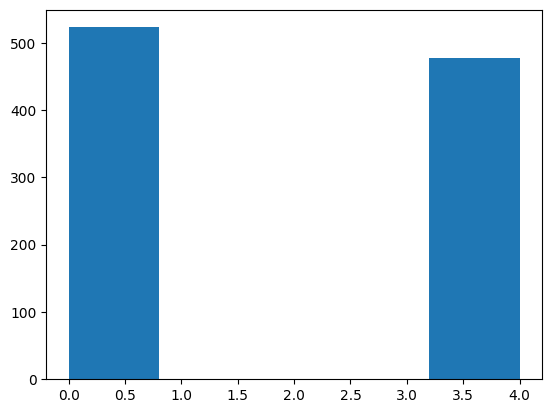

In [29]:
## histograma de estado absorbente
last_money=[]
for balance in balances:
  last_money.append(balance[-1])

plt.hist(last_money, bins=5)




(array([503.,   0.,   0., 242.,   0.,   0.,   0., 115.,   0.,   0.,   0.,
         75.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,  17.,   0.,   0.,
          0.,   9.,   0.,   0.,   0.,   8.,   0.,   0.,   2.]),
 array([ 2.        ,  2.51612903,  3.03225806,  3.5483871 ,  4.06451613,
         4.58064516,  5.09677419,  5.61290323,  6.12903226,  6.64516129,
         7.16129032,  7.67741935,  8.19354839,  8.70967742,  9.22580645,
         9.74193548, 10.25806452, 10.77419355, 11.29032258, 11.80645161,
        12.32258065, 12.83870968, 13.35483871, 13.87096774, 14.38709677,
        14.90322581, 15.41935484, 15.93548387, 16.4516129 , 16.96774194,
        17.48387097, 18.        ]),
 <BarContainer object of 31 artists>)

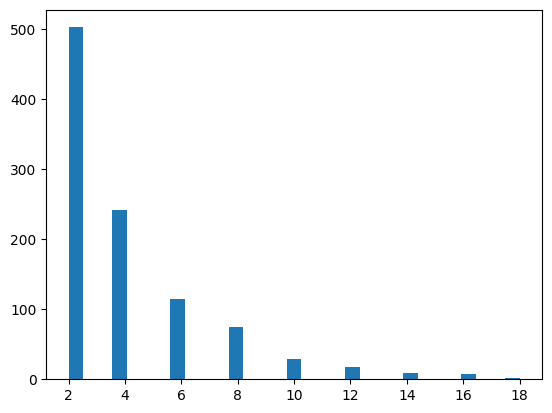

In [31]:
#para pregunta b tiempo de absorción
time=[]
for balance in balances:
  time.append(len(balance)-1)  # descuento el estado inicial

plt.hist(time, bins=31)

In [32]:
np.mean(time)

4.048

In [33]:
import collections

c = collections.Counter(time)
c

Counter({2: 503, 4: 242, 12: 17, 6: 115, 10: 29, 8: 75, 14: 9, 18: 2, 16: 8})

In [34]:
# para pregunta c
cuenta_estados=[[],[],[],[],[]]

for balance in balances:
    c= collections.Counter(balance)
    for i in range(5):
        cuenta_estados[i].append(c[i])

In [35]:
for i in range(5):
    print(i, sum(cuenta_estados[i])/runs)

0 0.523
1 1.034
2 2.024
3 0.99
4 0.477
